In [3]:
import IPython.display
IPython.display.display_latex(IPython.display.Latex(filename="./macros.tex"))

## <center>Метрики качества в задачах классификации</center>

_Проблема с accuracy_:
Несбалансированная выборка:
<br>
<br>
Предположим, что у нас есть некоторая обучающая выбока из 100 объектов, у которой 98 объектов принадлежат классу 0 и всеголишь 2 классу 1. Пусть наш алгоритм всегда предсказывает только класс объектов 0. Если посчитать accuracy такого классификатора. то acc=0.98. Можно ли его назвать хорошим?

<center>**Матрица ошибок**</center>
<img src="images/confusion_matrix.png">

В таких терминах, $accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

Давайте теперь введем (вспомним с лекции) следущие метрики: precision(точность) и recall(полнота).
$$precision = \frac{TP}{TP+FP}$$
$$recall= \frac{TP}{TP+FN}$$

Полнота меряет, действительно ли мы все объекты класса 1 отнесли к этому классу. 
А точность меряет, насколько хорошо мы понимаем что делаем и не относим все с подряд объекты к классу 1.
Понятно, что максимальные значения для точности и полноты это 1.
Давайте теперь измерим качество нашего классификатора:
$$precision = \frac{0}{0+0} = 0$$
$$recall = \frac{0}{2+0} = 0$$
Согласитесь, качество так себе.

Есть метрика, которая позволяет объеденить precision и recall в одну, так называемая F-мера. Она является гармоническим средним между точностью и полнотой:$$F = 2{\frac{precision*recall}{precision+recall}}$$  и равна 1, когда точность и полнота равны 1.

Precision и Recall это не 2 разных метрики, они всегда используются в паре.
<br>
<br>
$$\forall x \:\: \alg(x) = 1\Rightarrow Recall = 100\%$$
<br>
$$\forall x \:\: \alg(x) = 0\Rightarrow Type \:I \:error = 0$$
<br>
Но в зависимости от задачи вы можете выбирать, что приоритетнее.

**Precision and Recall depend on the balance of classes**

Пусть вы обучили классификатор, пусть он предсказывает в среднем правильно(правильно, это когда объект класса 0 относится к 0, а 1 к 1) с вероятностью P = 0.8. Возьмем выборку, где 50 объектов относится к классу 0, 50 к классу 1. Посчитаем PR.

TP = PxN_1 = 0.8x50 = 40
<br>
FP = (1-P)xN_0 = 0.2x50 = 10;
<br>
FN = (1-P)xN_1 = 0.2x50 = 10;
<br>
Precision = TP / (TP + FP) = 40 / 50 = 0.8
<br>
Recall = TP / (TP + FN) = 40 / 50 = 0.8

А теперь возьмем тот же классификатор, но будем мерить на другой выборке. Там объектов нулевого класса 50, а объектов первого класса 10. И посчитаем все то же самое

TP = PxN_1 = 0.8x10 = 8
<br>
FP = (1-P)xN_0 = 0.2x50 = 10;
<br>
FN = (1-P)xN_1 = 0.2x10 = 2;
<br>
Precision = TP / (TP + FP) = 8 / 18 = 0.44444
<br>
Recall = TP / (TP + FN) = 8 / 10 = 0.8

Давайте сделаем следующее: пусть у нас есть классфикатор, который с некой уверенностью предсказывает, 
принадлежит ли объект к классу 0. Отсортируем все объекты по возрастанию уверенности классификатора. И начнем строить значения precision и recall начиная с уверенности один, и так по убыванию. Теперь для порога 0.9:точность 1, а полнота 1/(1+2) 

<img src="images/PR-AUC.png" style="width: 300px;">

Давайте введем две следующих величины: 
$$TPR = \frac{TP}{TP+FN}$$
$$FPR= \frac{FP}{FP+TN}$$

TPR - число положительных срабатываний относительно общего числа примеров класса 1.
<br>
FPR - число отрицательных срабатываний относительно общего числа примеров класса 0.

Давайте построим графики аналогичным образом для данных величин. 

<img src="images/ROC-AUC.png" style="width: 300px;">

# Микро и макро усреднение 

<img src="./images/micro_macro.png" style="width: 300px;">

### Метод К ближайших соседей на NumPy

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [16]:
X_train = np.random.random([10, 2])
X_test = np.random.random([3, 2])

In [17]:
print(X_train)
print()
print(X_test)

[[0.48554003 0.23229453]
 [0.59857383 0.70328596]
 [0.60952266 0.17230464]
 [0.81655391 0.65899127]
 [0.87791053 0.71765371]
 [0.45912302 0.12204891]
 [0.33828877 0.14165284]
 [0.4990724  0.6934435 ]
 [0.25540759 0.66768375]
 [0.26266376 0.40630596]]

[[0.55498522 0.78687826]
 [0.99707632 0.18894041]
 [0.12626515 0.34234882]]


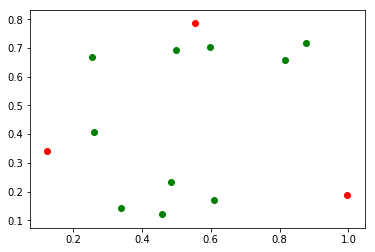

In [18]:
plt.scatter(X_train[:, 0], X_train[:, 1], color = 'g')
plt.scatter(X_test[:, 0], X_test[:, 1], color = 'r')

In [17]:
diff = X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :]
diff.shape

(3, 10, 2)

In [18]:
print(diff)

[[[-0.45079991 -0.0356473 ]
  [-0.30911369 -0.06030669]
  [ 0.03130663  0.16889686]
  [-0.47531367  0.22694334]
  [-0.89471089  0.026999  ]
  [ 0.03165327 -0.55203759]
  [-0.15652259 -0.01277772]
  [-0.29690201  0.4168451 ]
  [-0.67119385  0.22197311]
  [-0.25095898 -0.27639242]]

 [[-0.07782254  0.06643288]
  [ 0.06386368  0.04177348]
  [ 0.40428401  0.27097704]
  [-0.1023363   0.32902352]
  [-0.52173352  0.12907918]
  [ 0.40463064 -0.44995741]
  [ 0.21645478  0.08930246]
  [ 0.07607536  0.51892528]
  [-0.29821648  0.32405329]
  [ 0.12201839 -0.17431224]]

 [[ 0.27935627  0.16038337]
  [ 0.42104249  0.13572398]
  [ 0.76146282  0.36492753]
  [ 0.25484251  0.42297401]
  [-0.16455471  0.22302968]
  [ 0.76180945 -0.35600691]
  [ 0.57363359  0.18325296]
  [ 0.43325417  0.61287577]
  [ 0.05896233  0.41800378]
  [ 0.4791972  -0.08036174]]]


In [19]:
sq_diff = diff ** 2
sq_diff.shape

(3, 10, 2)

In [20]:
print(sq_diff)

[[[  2.03220560e-01   1.27073010e-03]
  [  9.55512757e-02   3.63689728e-03]
  [  9.80105316e-04   2.85261492e-02]
  [  2.25923086e-01   5.15032783e-02]
  [  8.00507579e-01   7.28946202e-04]
  [  1.00192949e-03   3.04745500e-01]
  [  2.44993207e-02   1.63270012e-04]
  [  8.81508053e-02   1.73759835e-01]
  [  4.50501189e-01   4.92720607e-02]
  [  6.29804093e-02   7.63927692e-02]]

 [[  6.05634765e-03   4.41332713e-03]
  [  4.07856940e-03   1.74502403e-03]
  [  1.63445557e-01   7.34285551e-02]
  [  1.04727180e-02   1.08256474e-01]
  [  2.72205865e-01   1.66614352e-02]
  [  1.63725956e-01   2.02461672e-01]
  [  4.68526734e-02   7.97492987e-03]
  [  5.78746029e-03   2.69283442e-01]
  [  8.89330699e-02   1.05010532e-01]
  [  1.48884882e-02   3.03847572e-02]]

 [[  7.80399265e-02   2.57228266e-02]
  [  1.77276778e-01   1.84209992e-02]
  [  5.79825622e-01   1.33172106e-01]
  [  6.49447062e-02   1.78907015e-01]
  [  2.70782519e-02   4.97422377e-02]
  [  5.80353643e-01   1.26740923e-01]
  [  3.2

In [21]:
dist_sq = sq_diff.sum(-1)
dist_sq.shape

(3, 10)

In [22]:
print(dist_sq)

[[ 0.20449129  0.09918817  0.02950625  0.27742636  0.80123653  0.30574743
   0.02466259  0.26191064  0.49977325  0.13937318]
 [ 0.01046967  0.00582359  0.23687411  0.11872919  0.2888673   0.36618763
   0.0548276   0.2750709   0.1939436   0.04527325]
 [ 0.10376275  0.19569778  0.71299773  0.24385172  0.07682049  0.70709457
   0.36263715  0.56332589  0.17820372  0.23608797]]


In [23]:
nearest = np.argsort(dist_sq, axis=1)
nearest.shape

(3, 10)

In [24]:
print(nearest)

[[6 2 1 9 0 7 3 5 8 4]
 [1 0 9 6 3 8 2 7 4 5]
 [4 0 8 1 9 3 6 7 5 2]]
